In [1]:
import pandas as pd

dataset=pd.read_csv("Euro2012_stats.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [2]:
dataset.Team.describe()

count          16
unique         16
top       Croatia
freq            1
Name: Team, dtype: object

In [3]:
cards=dataset.loc[:,["Team","Yellow Cards","Red Cards"]]
#（1）查询第6行是否有缺失值。
print("第6行是否有缺失值:",end=' ')
print(cards.loc[6][cards.loc[6].isnull().values==True])
#（2）删除一行内有两个以上（包含2个）缺失值的数据
sums = cards.isnull().sum(axis=1)
sums_result = list(sums[sums >= 2].index)
print("第{}行存在两个以上缺失值".format(sums_result))
cards.drop(sums_result,axis=0,inplace=True)
#（3）将Red Cards列中的缺失值用1填充。
cards["Red Cards"]=cards["Red Cards"].fillna(1)

第6行是否有缺失值: Red Cards    NaN
Name: 6, dtype: object
第[10]行存在两个以上缺失值


In [4]:
#（4）指定Yellow Cards和Red Cards列重复时去重,并保留最后出现的记录
cards = cards.drop_duplicates(subset=['Yellow Cards', 'Red Cards'], keep='last')
#（5）修改列名为‘团队’，‘红牌’，‘黄牌’，并将‘黄牌’和'红牌'两列互换位置,显示前5行数据。
cards.columns=['团队','黄牌','红牌'  ]  # type: ignore
cards[['黄牌','红牌']]=cards[['红牌','黄牌']]
cards.rename(columns={'红牌':'黄牌','黄牌':'红牌'},inplace=True)
cards.head()

,团队,红牌,黄牌
0,Croatia,0.0,9.0
5,Germany,0.0,4.0
6,Greece,1.0,9.0
7,Italy,0.0,50.0
9,Poland,1.0,7.0


In [5]:
cards[(cards['黄牌']>6) & (cards['红牌']==1)]

,团队,红牌,黄牌
6,Greece,1.0,9.0
9,Poland,1.0,7.0


In [6]:
#（7）对数据按照先红牌降序排序再黄牌升序进行排序。
cards.sort_values(by=['红牌','黄牌'],ascending=[False,True],inplace=True)
cards


,团队,红牌,黄牌
11,Republic of Ireland,1.0,6.0
9,Poland,1.0,7.0
6,Greece,1.0,9.0
5,Germany,0.0,4.0
15,Ukraine,0.0,5.0
12,Russia,0.0,6.0
14,Sweden,0.0,7.0
0,Croatia,0.0,9.0
13,Spain,0.0,11.0
7,Italy,0.0,50.0


In [7]:
import numpy as np


#（8）计算每个球队拿到的黄牌数的平均值。
print(np.mean(cards['黄牌']))

11.4


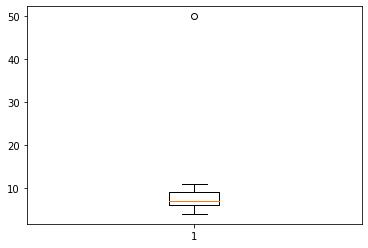

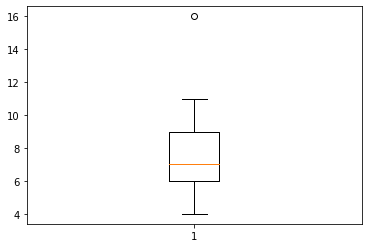

In [8]:
from matplotlib import pyplot as plt

def unusual(data):
    df = data['黄牌']
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    un = (Q3 + 1.5 * IQR < df) | (df < Q1 - 1.5 * IQR)
    #print("箱线图法异常值检测：\n", un, "\n")
    return un

plt.boxplot(cards['黄牌'])
plt.show()

un=unusual(cards)
temp = cards.loc[list(un[un == True].index)]
temp['黄牌'] = 16
cards.loc[list(un[un == True].index)] = temp
cards.loc[list(un[un == True].index)]

plt.boxplot(cards['黄牌'])
plt.show()

In [9]:
cards.to_csv("write_data.csv")

d:\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


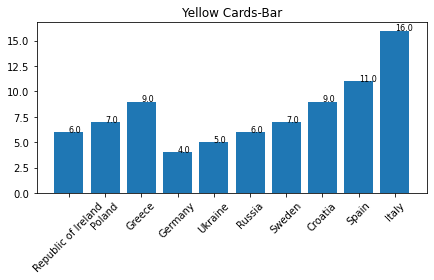

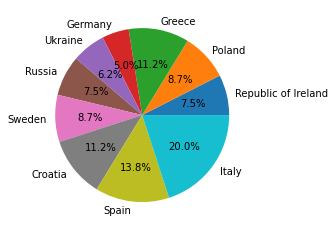

In [10]:
cards=pd.read_csv("write_data.csv",index_col=0)
plt.bar(cards['团队'],cards['黄牌'])
plt.xticks(rotation=45)
for x,y in zip(cards['团队'],cards['黄牌']):
    plt.text(x, y, '%.1f' % y, fontdict={'fontsize': 8})
plt.title("Yellow Cards-Bar")
plt.tight_layout()
plt.show()


#饼图
plt.pie(cards['黄牌'], autopct='%1.1f%%', labels=cards['团队'],radius=1)   # type: ignore
plt.show()
